In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


Saving SDAIAData2.csv to SDAIAData2.csv
Saving SDAIA_Data.csv to SDAIA_Data.csv


In [ ]:
budget = pd.read_csv("SDAIA_Data.csv")
activities = pd.read_csv("SDAIAData2.csv")

budget.columns = budget.columns.str.strip()
activities.columns = activities.columns.str.strip()


In [ ]:

budget['المنصرف (ريال)'] = (
    budget['المنصرف (ريال)']
    .astype(str)
    .str.replace(',', '')
    .str.replace('ريال', '')
)
budget['المنصرف (ريال)'] = pd.to_numeric(budget['المنصرف (ريال)'], errors='coerce')

activities['عدد المتخرجين'] = pd.to_numeric(activities['عدد المتخرجين'], errors='coerce')


In [ ]:

program_budget = budget[budget['اسم البند'] == 'البرامج']


In [ ]:

budget_yearly = program_budget.groupby('السنة المالية', as_index=False)['المنصرف (ريال)'].sum()
budget_yearly['السنة المالية'] = budget_yearly['السنة المالية'].astype(int)


graduates_yearly = activities.groupby('العام', as_index=False)['عدد المتخرجين'].sum()
graduates_yearly['العام'] = graduates_yearly['العام'].astype(int)


activities_count = activities.groupby('العام').size().to_frame('عدد الأنشطة').reset_index()
activities_count['العام'] = activities_count['العام'].astype(int)


In [ ]:

df = budget_yearly.merge(graduates_yearly, left_on='السنة المالية', right_on='العام', how='inner')
df = df.merge(activities_count, left_on='السنة المالية', right_on='العام', how='inner')


df = df.drop(columns=['العام_x', 'العام_y'])


In [ ]:

df['Cost_per_Graduate'] = df['المنصرف (ريال)'] / df['عدد المتخرجين']


df['Graduates_per_Activity'] = df['عدد المتخرجين'] / df['عدد الأنشطة']

df


,السنة المالية,المنصرف (ريال),عدد المتخرجين,عدد الأنشطة,Cost_per_Graduate,Graduates_per_Activity
0,2024,0.0,12568.0,27,0.0,465.481481
1,2025,0.0,53205.0,45,0.0,1182.333333


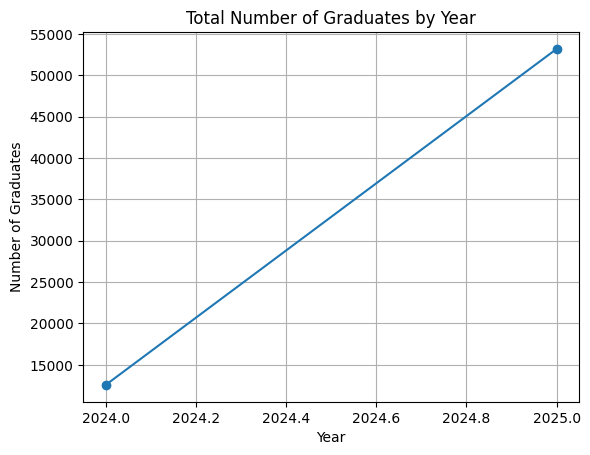

In [ ]:
import matplotlib.pyplot as plt

graduates_year = df.groupby('السنة المالية')['عدد المتخرجين'].sum()

plt.figure()
plt.plot(graduates_year.index, graduates_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.title('Total Number of Graduates by Year')
plt.grid(True)
plt.show()


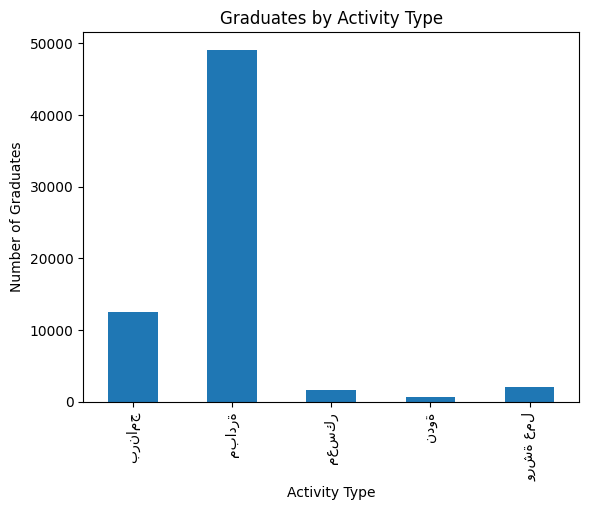

In [ ]:
graduates_by_activity = activities.groupby('نوع النشاط')['عدد المتخرجين'].sum()

plt.figure()
graduates_by_activity.plot(kind='bar')
plt.xlabel('Activity Type')
plt.ylabel('Number of Graduates')
plt.title('Graduates by Activity Type')
plt.show()


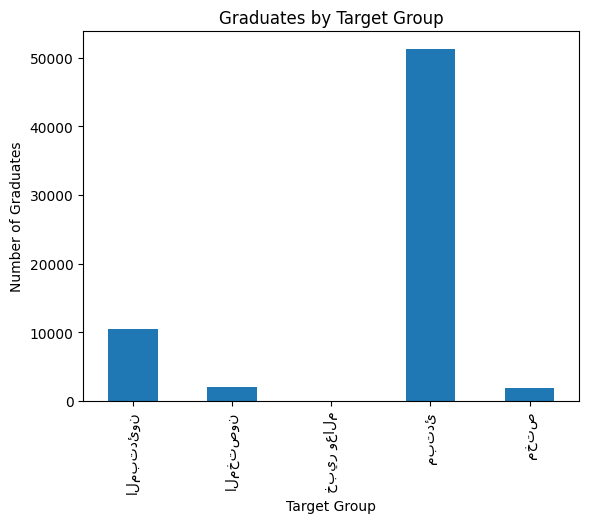

In [ ]:
graduates_by_target = activities.groupby('الفئة المستهدفة')['عدد المتخرجين'].sum()

plt.figure()
graduates_by_target.plot(kind='bar')
plt.xlabel('Target Group')
plt.ylabel('Number of Graduates')
plt.title('Graduates by Target Group')
plt.show()


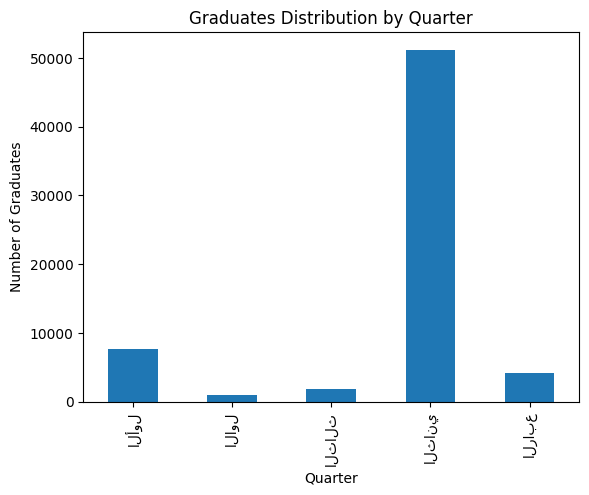

In [ ]:
graduates_by_quarter = activities.groupby('الربع')['عدد المتخرجين'].sum()

plt.figure()
graduates_by_quarter.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Number of Graduates')
plt.title('Graduates Distribution by Quarter')
plt.show()


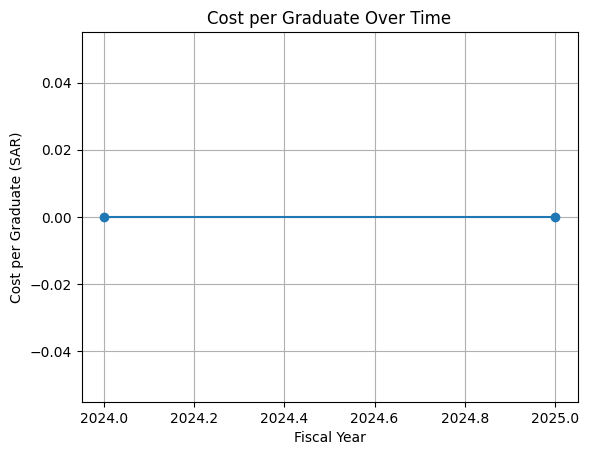

In [ ]:
plt.figure()
plt.plot(
    df['السنة المالية'],
    df['Cost_per_Graduate'],
    marker='o'
)
plt.xlabel('Fiscal Year')
plt.ylabel('Cost per Graduate (SAR)')
plt.title('Cost per Graduate Over Time')
plt.grid(True)
plt.show()


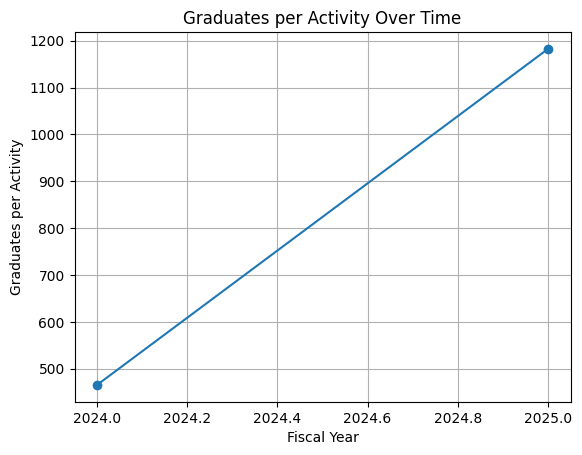

In [ ]:
plt.figure()
plt.plot(
    df['السنة المالية'],
    df['Graduates_per_Activity'],
    marker='o'
)
plt.xlabel('Fiscal Year')
plt.ylabel('Graduates per Activity')
plt.title('Graduates per Activity Over Time')
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

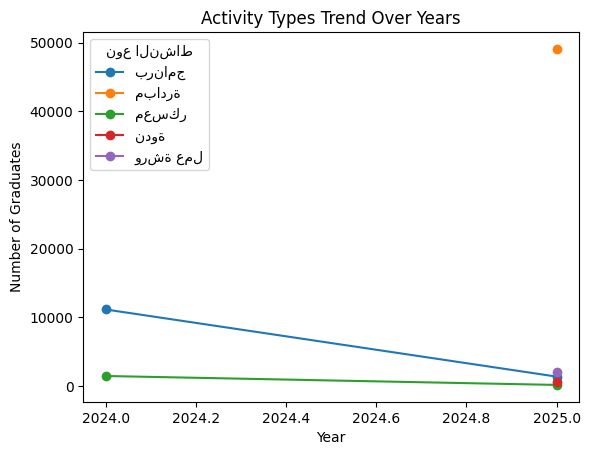

In [ ]:
activity_trend = activities.pivot_table(
    values='عدد المتخرجين',
    index='العام',
    columns='نوع النشاط',
    aggfunc='sum'
)

plt.figure()
activity_trend.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.title('Activity Types Trend Over Years')
plt.show()


In [ ]:
df.to_csv("analysis_ready.csv", index=False, encoding="utf-8-sig")

from google.colab import files
files.download("analysis_ready.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>